## Write a NumPy program to generate a set of data and fit a statistical model using SciPy's optimize module for maximum likelihood estimation (MLE).

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [5]:
def mle():
    np.random.seed(42)
    data = np.random.normal(loc=5.0, scale=2.0, size=1000)
    
    def neg_log_likelihood(params: tuple):
        (mu, sigma) = params
        
        if sigma < 0:
            return np.inf
        
        nll = -np.sum(np.log(1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(data - mu) ** 2 / (2 * sigma ** 2))))
        return nll
    
    initial_params = np.array([0.0, 1.0])
    
    result = minimize(neg_log_likelihood, initial_params, method='L-BFGS-B', bounds=[(None, None), (1e-5, None)])
    
    (mu_mle, sigma_mle) = result.x
    
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    
    x = np.linspace(min(data), max(data), 1000)
    fitted_pdf = (1 / (np.sqrt(2 * np.pi) * sigma_mle)) * np.exp(-(x - mu_mle) ** 2 / (2 * sigma_mle ** 2))
    plt.plot(x, fitted_pdf, label="Fitted Normal Distribution", linewidth=2)
    
    plt.xlabel('Data values')
    plt.ylabel('Density')
    plt.title('Data and Fitted Normal Distribution using MLE')
    plt.legend()
    plt.show()
    
    return mu_mle, sigma_mle

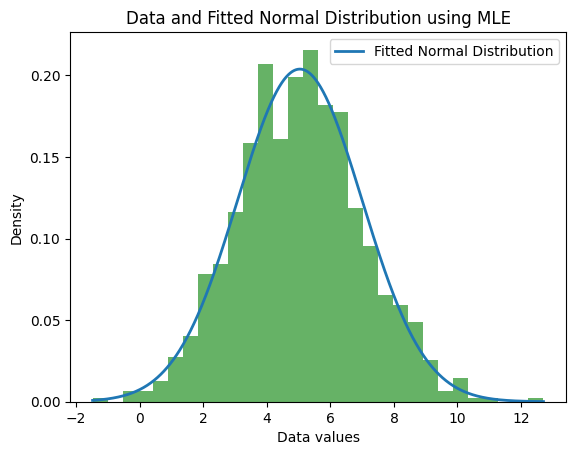

(np.float64(5.038665657992664), np.float64(1.9574636614088121))

In [6]:
mle()